In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


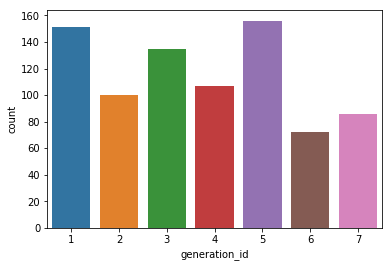

In [6]:
# to start off with, let's create a bar chart on one of the categorical variable in the dataset, `generation_id`
# eventhough the values in this column look numeric, they are just categorical labels indicating when each species was
# introduced to the series from 1st generation to 7th generation

sb.countplot(data = pokemon, x = 'generation_id');

In [10]:
# Since no need for these color above

sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [11]:
# I will pick the first tuple

sb.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [13]:
# and store it in a variable

base_color = sb.color_palette()[0]

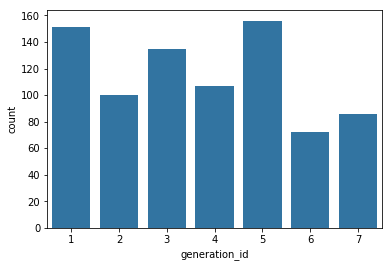

In [14]:
# Then set the plot with this tuple

sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

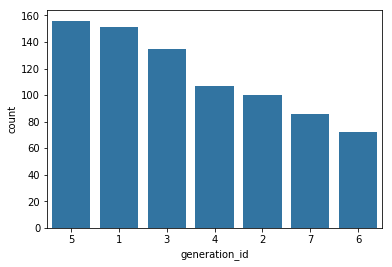

In [16]:
# Sort the bars

sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
             order = [5,1,3,4,2,7,6]);

In [17]:
# Or Sort the bars programatically

pokemon['generation_id'].value_counts()

# sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
#             order = [5,1,3,4,2,7,6]);

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [18]:
# take the indeces 

gen_order = pokemon['generation_id'].value_counts().index

# sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
#             order = [5,1,3,4,2,7,6]);

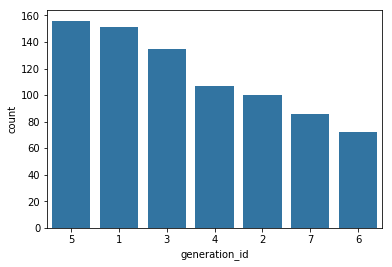

In [19]:
 sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
             order = gen_order);

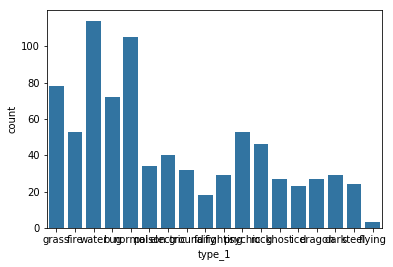

In [20]:
# let's chart another column `type_1`

sb.countplot(data = pokemon, x = 'type_1', color = base_color);

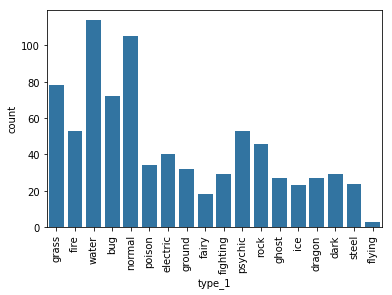

In [21]:
# the labels not readable !
# Use plt.xticks() function

sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation = 90);

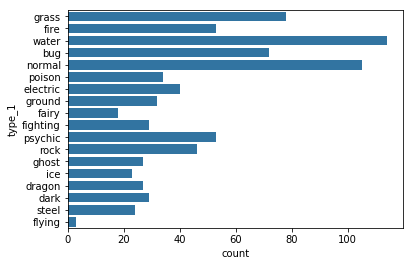

In [22]:
# Alternativally, rotate the whole chart

sb.countplot(data = pokemon, y = 'type_1', color = base_color);

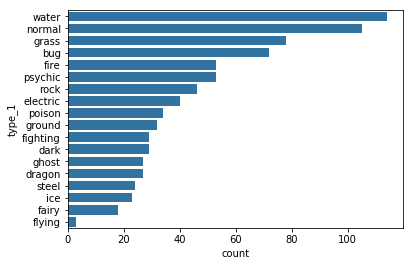

In [23]:
# For Ordering

type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

In [25]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level', value_name = 'type').dropna()

pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


### What proportion of Pokemon have each type?

In [26]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

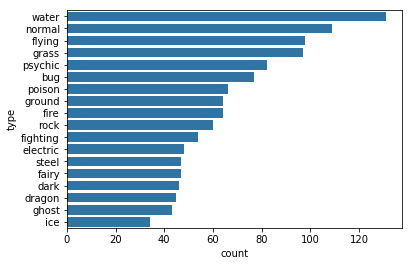

In [28]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

#### Change the tick marks from labeling the absolute counts to relative counts.

In [29]:
# Creating a list of tick positions
# We start by computing the length of the longest bar in terms of proportion
# The original pokemon dataframe gives us the denominator, and we will use value_counts() to get the numerator

n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [30]:
# Now we use NumPy's arange function to produce a set of evenly spaced proportioned values between 0 and the max in steps of 2% 

np.arange(0, max_prop, 0.02)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [32]:
# Store the values in tick_props

tick_props = np.arange(0, max_prop, 0.02)

# Also, use a list comprehension to create an additional variable tick_names to apply to the tick labels
# Tese strings will show the proportions with a consistent two decimal places

['{:0.2f}'.format(v) for v in tick_props]

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

In [33]:
# Store it

tick_names = ['{:0.2f}'.format(v) for v in tick_props]

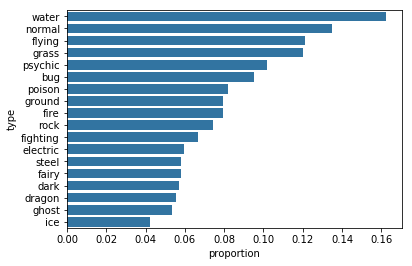

In [34]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

# To change the tick locations and labels we use xticks() function, the first argument sets the tick positions
# Since the counts are still an absolute value we need the multiplcation to get their position correct
# The second argument sets the tick labels, 
# We need to use both arguments here since the positions and their values are different

plt.xticks(tick_props * n_pokemon, tick_names)

# Finally, we use the xlabel() function to change the x-axis label from the default count to more appropriate proportion

plt.xlabel('proportion');

> The resulting plot shows us that about 16% of all Pokemon include the water type all the way down to only 4% that include the ice type

In [ ]:
# Alternativelly, maybe we want to have the axes in terms of counts, and use text on the bars to show proportion
# This is the flixibility of Matplotlib can shine


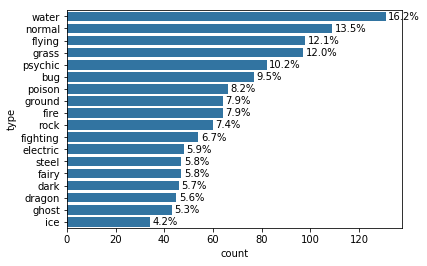

In [38]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

# We use a loop to place text elements one by one 
# The first argument to the txet function is the X position just after the end of the bar
# The second argument is the Y position which starts at 0 and increments with the loop 
# The third argument is the string to be printed, the percentage
# Finally, I am going to an optional parameter va, to center the vertical alignment of text on each bar

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center');